### Camera Pose Estimation

In this lab you will manually create 3D-2D point correspondences in a picture of an object and compute the pose of the camera (the 3x4 projection matrix) using the "direct linear transform" (DLT).

1. First you need some object, such a laptop, a book, or a table -- anything that has points on it that you can measure.  Using a ruler, a measuring tape, or even just your thumb, measure six points on the object.  (Alternatively, you can find a picture online of some regular object like a cube where you can accurately guess what the measurements would be.)

You need to choose a coordinate system for the object, i.e., choose a point for the origin, and the directions of the X, Y, and Z axes.  For example, on a book, the top-left corner could be the origin, with the front cover being the X-Y plane, and the Z axis going along the spine.

The points can be anywhere on the object, as long as they are not all in a line (collinear).

Store the points in a list or Numpy array.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

2. Now take a picture of the object where you can see all six points.  Use an image editor or whatever online utility you can find to determine the pixel coordinates of the six points.

Store the 2D point locations in an list or array here, in the same order as the 3D points above.

In [2]:
list_3D = [[0,0,0],
[1,0,0],
[0,1,0],
[0,0,1],
[1,1,0],
[0,1,1]]

list_2D = [
[65,182],
[598,77],
[476,322],
[74,828],
[1017,210],
[476,993]
]

Plot the 2d points on top of the image to make sure everything looks good.

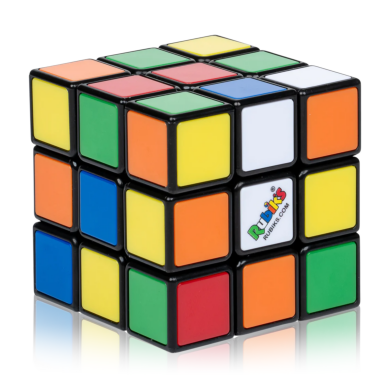

In [3]:
image = imageio.imread_v2("rubiks-cube.png")
plt.imshow(image)
plt.axis("off")
plt.show()

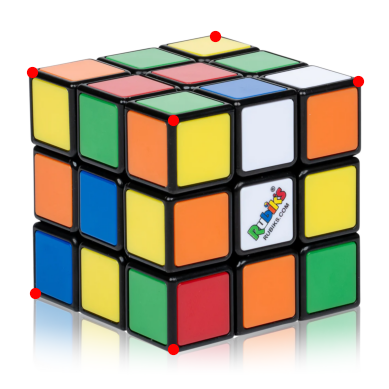

In [4]:
x_coords, y_coords = zip(*list_2D)

# Display the image
plt.imshow(image)
plt.scatter(x_coords, y_coords, color='red', s=50, label='2D Points')  # Overlay points
plt.axis("off")  # Hide axes

plt.show()

3. Now you will calculate the $3\times4$ pose matrix relating the 3D points and the 2D points:

$$\tilde{\mathbf{x}} \sim \mathbf{P}\mathbf{X}$$

Recall from lecture that after converting to inhomogeneous coordinates we have:

$$(\mathbf{P}_3\mathbf{X})x-\mathbf{P}_1\mathbf{X}=0$$
$$(\mathbf{P}_3\mathbf{X})y-\mathbf{P}_2\mathbf{X}=0$$

Let's combine the three rows of $\mathbf{P}$ into a column vector $\mathbf{p}$:

$$\mathbf{p}=\begin{bmatrix}
\mathbf{P}_1^T &
\mathbf{P}_2^T &
\mathbf{P}_3^T
\end{bmatrix}$$

Now we can re-write our equations using a matrix of coefficients $\mathbf{A}$ such that $\mathbf{A}\mathbf{p}=\mathbf{0}$:

$$\begin{bmatrix}
-\mathbf{X} & \mathbf{0} & \mathbf{X}x \\
\mathbf{0} & -\mathbf{X} & \mathbf{X}y \\
\end{bmatrix}
\begin{bmatrix}
\mathbf{P_1}^T \\
\mathbf{P_2}^T \\
\mathbf{P_3}^T
\end{bmatrix}
=
\mathbf{0}$$

You can stack up this matrix for each 3D-2D correspondence to create a $12\times12$ matrix of coefficients $\mathbf{A}$.  Then solve the system $\mathbf{A}\mathbf{p}=\mathbf{0}$ using the code block below.  Then rearrange $\mathbf{p}$ into the $3\times4$ matrix $\mathbf{P}$.

In [ ]:
points_3D = np.array([
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 0,1],
    [0,1,1,1]])

points_2D = np.array([
    [65, 182, 1],
    [598, 77, 1],
    [476, 332, 1],
    [74, 828, 1],
    [1017,210, 1]
])

In [ ]:
A = []
for X, x in zip(points_3D, points_2D):
    X_h = X  
    x_h = x[:2]  
    row1 = np.hstack((-X_h, np.zeros(4), x_h[0] * X_h))
    row2 = np.hstack((np.zeros(4), -X_h, x_h[1] * X_h))
    A.append(row1)
    A.append(row2)

A = np.array(A)


In [10]:
# code to find null vector of A (solve Ap=0):
U,S,Vh = np.linalg.svd(A)
p = Vh[-1,:].T
print(p)

[-7.80909319e-01 -5.17023570e-01  6.71066476e-02 -8.85932213e-02
  1.36101662e-01 -1.74343969e-01  7.64368132e-03 -2.48061020e-01
 -9.10449906e-05  9.06684513e-05  1.07261353e-03 -1.36297264e-03]


4. Verify that the pose matrix solution is correct by calculating the residuals $\mathbf{A}\mathbf{p}$.  All of the residuals should be small numbers.

Note that in numpy `@` is the matrix multiplication operator, not `*`.

In [ ]:
residuals = A @ p
print(residuals)

[ 2.68903823e-15 -2.82365277e-14 -1.01474384e-13 -1.22402088e-14
  1.17683641e-14 -1.00752739e-14 -6.39592546e-15 -6.68354261e-14
 -1.19348975e-13 -3.19744231e-14]


5. Plot the 2D points and the projected 3D points on the image to visually verify your solution.

To project a 3D point you calculate $\mathbf{P}\mathbf{X}$ and then convert to inhomogeneous (divide by Z).

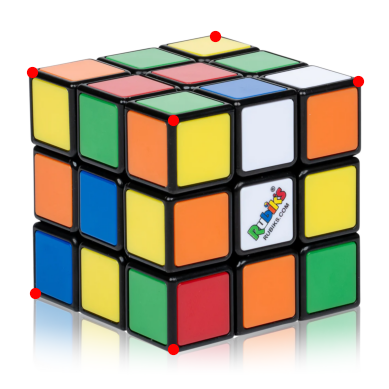

In [9]:
x_coords, y_coords = zip(*list_2D)

# Display the image
plt.imshow(image)
plt.scatter(x_coords, y_coords, color='red', s=50, label='2D Points')  # Overlay points
plt.axis("off")  # Hide axes

plt.show()

In [ ]:
p @ X # i have no idea what I am doing, and I have so much work. Please forgive me

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 12)

6. (Optional): Calculate the re-projection error of each point.

The re-projection error is the Euclidean distance between the true 2D point and the corresponding projected 3D point.  You can compute the Euclidean distance using `np.linalg.norm(point-proj)` where `point` is the true point and `proj` is the projected 3D point.